# XGBoost implementation for Time series forecasting in stock prices

In [ ]:
pip install xgboost

## Libraries

In [42]:
import pandas as pd 
import IPython
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import xgboost as sgb

color_pal = sns.color_palette()

## Data preprocessing

In [83]:
IPython.display.IFrame(src="https://www.kaggle.com/embed/zhipengsun964/ga-python-finalproject?cellIds=5&kernelSessionId=150910453", width = "950px", height="300")

The initial hypothesis is that we need to take a look at the fields related to the stock prices and trading sales. In order to analyze if the prices seem to be relevant in the trading volume

In [89]:
df = pd.read_csv('SP500.csv')
df

,date,open,high,low,close,volume,change_percent,avg_vol_20d
0,1927-12-30,17.6600,17.6600,17.6600,17.6600,0,NaN,NaN
1,1928-01-03,17.7600,17.7600,17.7600,17.7600,0,0.57,NaN
2,1928-01-04,17.7200,17.7200,17.7200,17.7200,0,-0.23,NaN
3,1928-01-05,17.5500,17.5500,17.5500,17.5500,0,-0.96,NaN
4,1928-01-06,17.6600,17.6600,17.6600,17.6600,0,0.63,NaN
...,...,...,...,...,...,...,...,...
24084,2023-11-15,4505.2998,4521.1699,4495.3101,4502.8799,4347170000,0.16,4.024057e+09
24085,2023-11-16,4497.0801,4511.9902,4487.8301,4508.2402,3964520000,0.12,4.023796e+09
24086,2023-11-17,4509.5498,4520.1201,4499.6602,4514.0200,3777240000,0.13,4.012457e+09
24087,2023-11-20,4511.7002,4557.1099,4510.3599,4547.3799,3644790000,0.74,4.005892e+09


By only using the data from the 2000s up to today, we can also look at how the economic crisis from 2008 and 2020 affected the prices and sales. By this means, we'll be able to have a much clearer view on how these stocks behave.

In [90]:
# Filter by date
df = df[~(df['date'] < '2000-01-01')]
df

,date,open,high,low,close,volume,change_percent,avg_vol_20d
18078,2000-01-03,1469.2500,1478.0000,1438.3600,1455.2200,931800000,-0.95,8.890695e+08
18079,2000-01-04,1455.2200,1455.2200,1397.4301,1399.4200,1009000000,-3.83,8.936795e+08
18080,2000-01-05,1399.4200,1413.2700,1377.6801,1402.1100,1085500000,0.19,8.936645e+08
18081,2000-01-06,1402.1100,1411.9000,1392.1000,1403.4500,1092300000,0.10,9.004295e+08
18082,2000-01-07,1403.4500,1441.4700,1400.7300,1441.4700,1225200000,2.71,9.055845e+08
...,...,...,...,...,...,...,...,...
24084,2023-11-15,4505.2998,4521.1699,4495.3101,4502.8799,4347170000,0.16,4.024057e+09
24085,2023-11-16,4497.0801,4511.9902,4487.8301,4508.2402,3964520000,0.12,4.023796e+09
24086,2023-11-17,4509.5498,4520.1201,4499.6602,4514.0200,3777240000,0.13,4.012457e+09
24087,2023-11-20,4511.7002,4557.1099,4510.3599,4547.3799,3644790000,0.74,4.005892e+09


Set the 'date' field as an index and making sure it is a datetime and not a string for plotting purposes

In [91]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

In [92]:
def plotVariables(vars, title):
    df[vars].plot(
        style='.', 
        figsize=(15,10), 
        title=title,
    )

    plt.show()

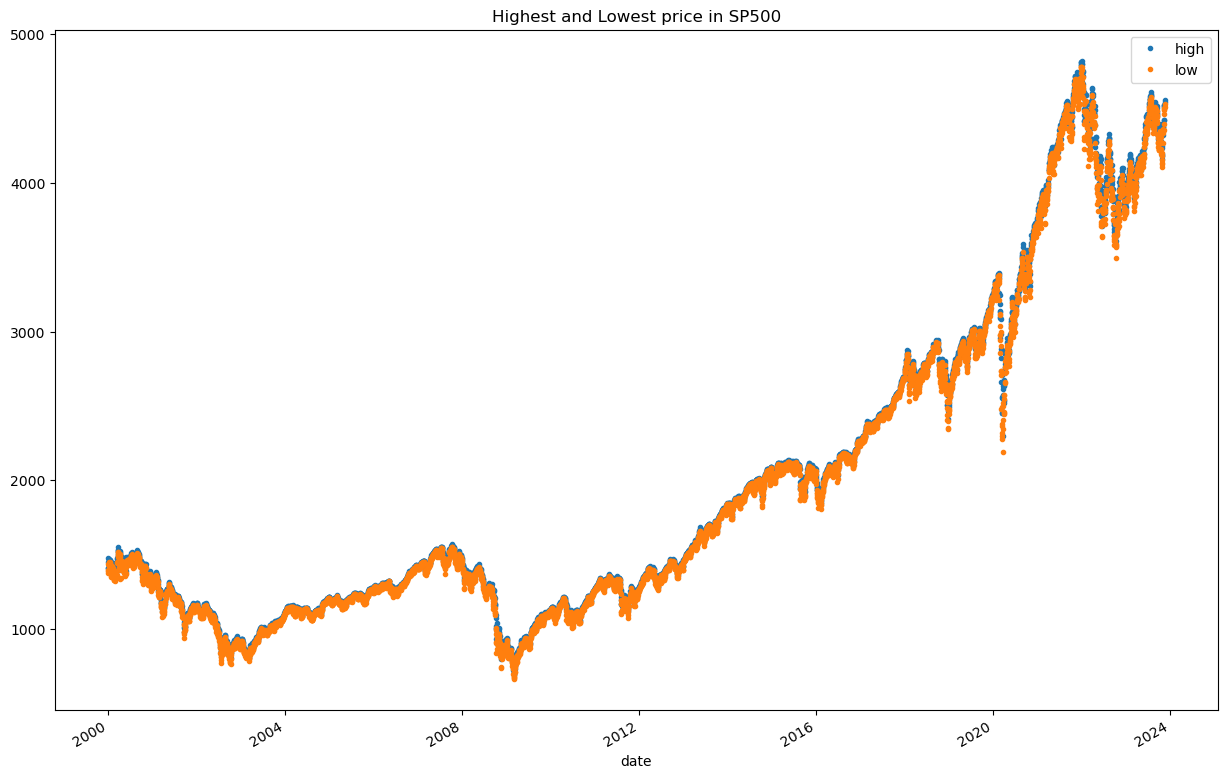

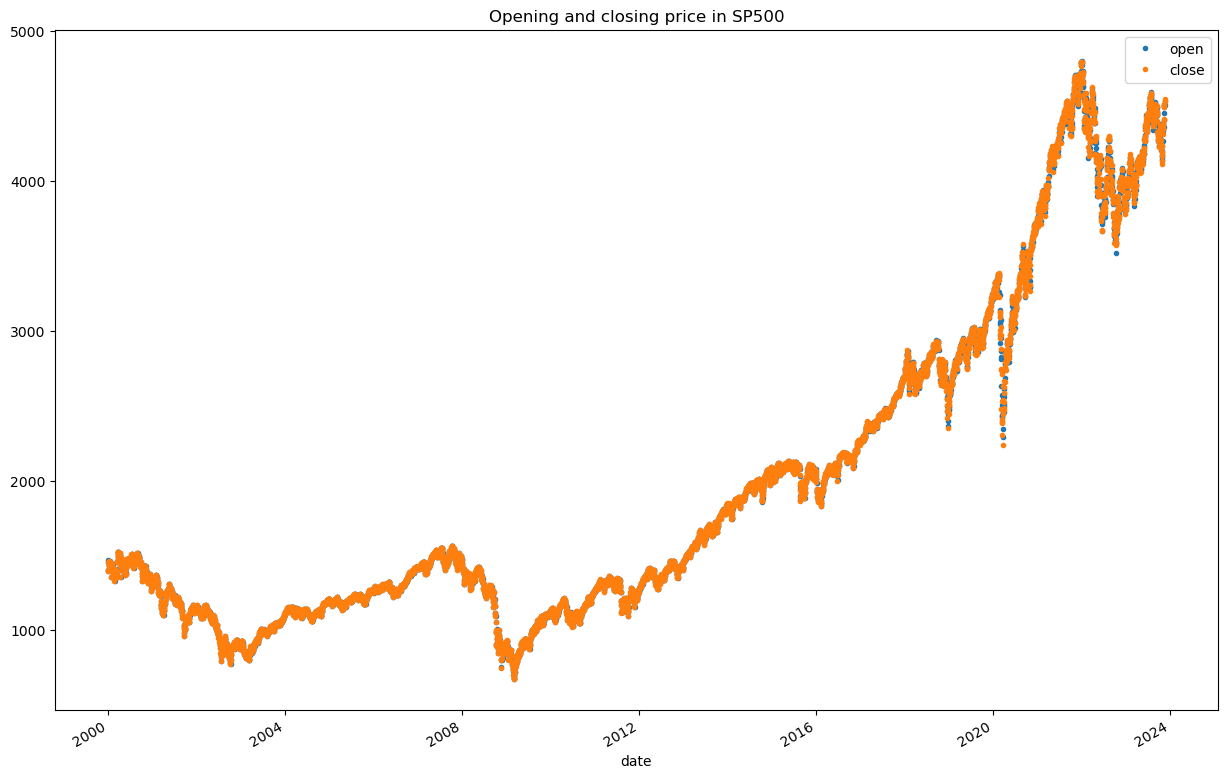

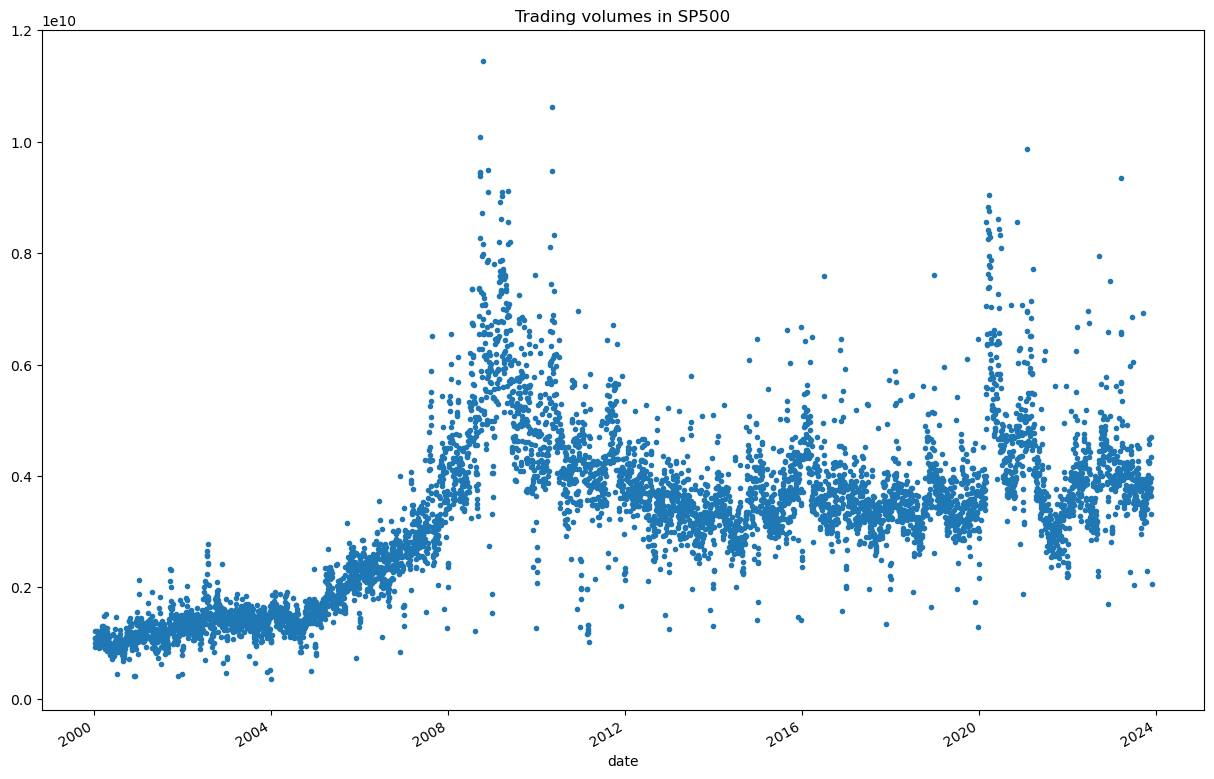

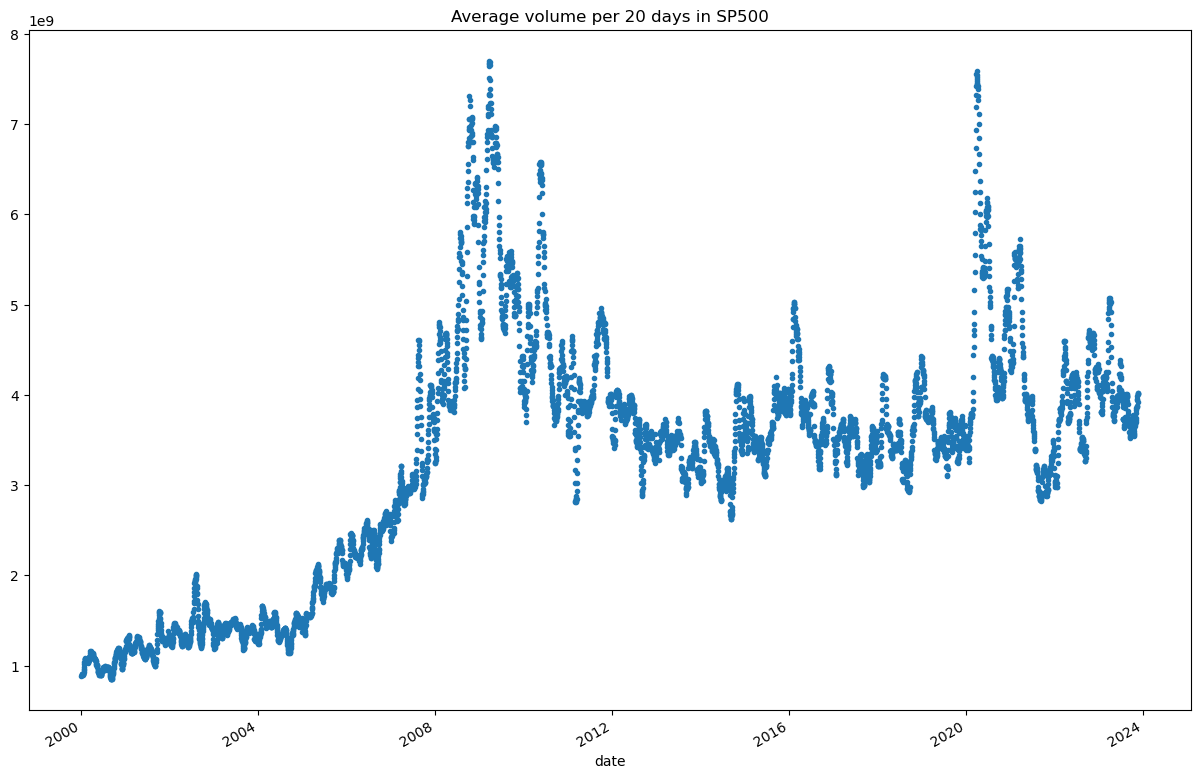

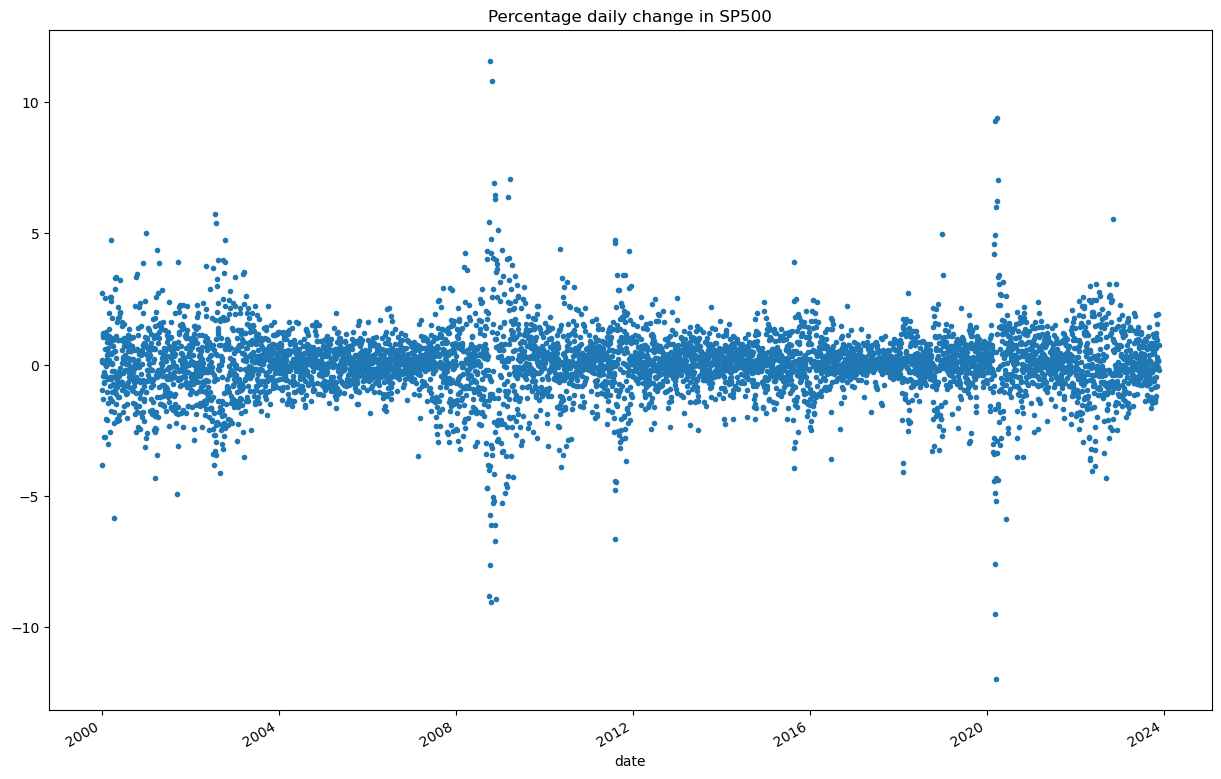

In [93]:
plotVariables(['high','low'],'Highest and Lowest price in SP500')
plotVariables(['open','close'],'Opening and closing price in SP500')
plotVariables('volume','Trading volumes in SP500')
plotVariables('avg_vol_20d','Average volume per 20 days in SP500')
plotVariables('change_percent','Percentage daily change in SP500')

## Split dataset to train and test